## Post Sentiment Classification Task

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

In [2]:
train_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7f317,https://www.reddit.com/r/relationships/comment...,Melodrama_,"It's a sad realization, isn't it?",,False,2,t1_cy7erc5,negative,1.000000
1,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hlyf,https://www.reddit.com/r/relationships/comment...,Melodrama_,I told her a couple of minutes ago that I didn...,elaboration,False,2,t1_cy7erc5,neutral,0.483631
2,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7etrr,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Leeches don't make good friends.,answer,False,1,t3_3xshx9,positive,0.600000
3,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hhpq,https://www.reddit.com/r/relationships/comment...,Melodrama_,I just ended it. Apparently she wasn't a good ...,elaboration,False,2,t1_cy7etrr,positive,0.475000
4,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7q0qg,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Good for you! Make sure you stick with it.,appreciation,False,3,t1_cy7hhpq,positive,0.744444
...,...,...,...,...,...,...,...,...,...,...,...,...
12133,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpyd0,https://www.reddit.com/r/reddit.com/comments/h...,,"If you were God, you'd know whether we would b...",answer,False,1,t3_hzu51,neutral,0.000000
12134,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpz7m,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,If I check my account balance in 5 minutes and...,answer,False,1,t3_hzu51,neutral,0.000000
12135,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq0tl,https://www.reddit.com/r/reddit.com/comments/h...,alllie,I don't know. Can you heal the sick with a tou...,answer,False,1,t3_hzu51,negative,0.637202
12136,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq19j,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,... Give LeBron James a championship ring?,humor,False,2,t1_c1zq0tl,neutral,0.000000


### Q1: Use the text from the reddit posts (Known as “body”) to train classification models

In [3]:
# Your code here

# Explore the distribution of sentiment polarity
import collections
import matplotlib.pyplot as plt

total_data = [train_data, validation_data, test_data]
for data in total_data:
    print('-----------------------------')
    label_counts = collections.Counter(data['sentiment.polarity'])
    for label in label_counts:
        print("category: " + str(label))
        print(label_counts[label] / len(data))
        print('----------------')

-----------------------------
category: negative
0.07233481627945296
----------------
category: neutral
0.6326412918108419
----------------
category: positive
0.2661888284725655
----------------
category: very positive
0.02084363157027517
----------------
category: very negative
0.007991431866864393
----------------
-----------------------------
category: very positive
0.02348021871984561
----------------
category: neutral
0.6307494371180444
----------------
category: positive
0.2717915728530074
----------------
category: negative
0.069154068832422
----------------
category: very negative
0.004824702476680605
----------------
-----------------------------
category: neutral
0.625996015936255
----------------
category: positive
0.274402390438247
----------------
category: very positive
0.02141434262948207
----------------
category: negative
0.07021912350597609
----------------
category: very negative
0.00796812749003984
----------------


In [4]:
# Create class labels

def create_cate(string):
    if string == 'very negative':
        return 0
    elif string == 'negative':
        return 1
    elif string == 'neutral':
        return 2
    elif string == 'positive':
        return 3
    elif string == 'very positive':
        return 4
train_data['cate'] = train_data['sentiment.polarity'].apply(create_cate)
validation_data['cate'] = validation_data['sentiment.polarity'].apply(create_cate)
test_data['cate'] = test_data['sentiment.polarity'].apply(create_cate)

array([[<AxesSubplot:title={'center':'cate'}>]], dtype=object)

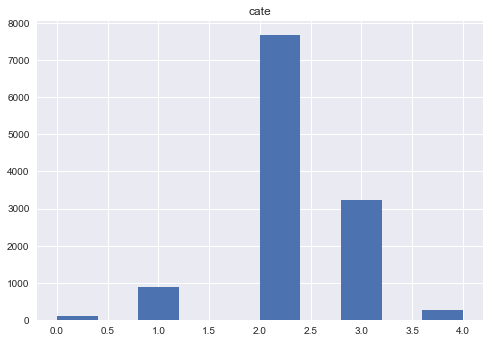

In [5]:
plt.style.use('seaborn')
train_data.hist('cate')

In [6]:
# Save labels for future use

train_labels = train_data['sentiment.polarity']
validation_labels = validation_data['sentiment.polarity']
test_labels = test_data['sentiment.polarity']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn import metrics

# One-hot vectorization
onehot_vectorizer = CountVectorizer(binary=True)
train_features = onehot_vectorizer.fit_transform(train_data['body'])
validation_features = onehot_vectorizer.transform(validation_data['body'])
test_features = onehot_vectorizer.transform(test_data['body'])


In [8]:
# (a) Dummy Classifier with strategy="most_frequent"

dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(train_features, train_labels)
print(dummy_mf.score(validation_features, validation_labels))
print(metrics.classification_report(dummy_mf.predict(validation_features), validation_labels, digits=3, zero_division=0))


0.6307494371180444
               precision    recall  f1-score   support

     negative      0.000     0.000     0.000         0
      neutral      1.000     0.631     0.774      3109
     positive      0.000     0.000     0.000         0
very negative      0.000     0.000     0.000         0
very positive      0.000     0.000     0.000         0

     accuracy                          0.631      3109
    macro avg      0.200     0.126     0.155      3109
 weighted avg      1.000     0.631     0.774      3109



In [9]:
# (b) Dummy Classifier with strategy="stratified"

dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels)
print(dummy_prior.score(validation_features, validation_labels))
print(metrics.classification_report(dummy_prior.predict(validation_features), validation_labels, digits=3, zero_division=0))


0.49179800578964294
               precision    recall  f1-score   support

     negative      0.084     0.074     0.079       242
      neutral      0.642     0.634     0.638      1984
     positive      0.260     0.274     0.267       804
very negative      0.000     0.000     0.000        27
very positive      0.000     0.000     0.000        52

     accuracy                          0.481      3109
    macro avg      0.197     0.196     0.197      3109
 weighted avg      0.483     0.481     0.482      3109



In [10]:
# (c) LogisticRegression with One-hot vectorization

lr = LogisticRegression(solver='saga', max_iter = 10000)
lr_model = lr.fit(train_features, train_labels)
print(metrics.classification_report(lr_model.predict(validation_features), validation_labels, digits=3, zero_division=0))

               precision    recall  f1-score   support

     negative      0.247     0.510     0.332       104
      neutral      0.881     0.774     0.824      2232
     positive      0.612     0.701     0.653       738
very negative      0.133     0.400     0.200         5
very positive      0.288     0.700     0.408        30

     accuracy                          0.746      3109
    macro avg      0.432     0.617     0.483      3109
 weighted avg      0.789     0.746     0.762      3109



In [11]:
# (e) SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings))
svm_model = svm.SVC(kernel='rbf').fit(train_features, train_labels)
print(metrics.classification_report(svm_model.predict(validation_features), validation_labels, digits=3, zero_division=0))

               precision    recall  f1-score   support

     negative      0.023     0.556     0.045         9
      neutral      0.946     0.722     0.819      2570
     positive      0.462     0.736     0.567       530
very negative      0.000     0.000     0.000         0
very positive      0.000     0.000     0.000         0

     accuracy                          0.724      3109
    macro avg      0.286     0.403     0.286      3109
 weighted avg      0.861     0.724     0.774      3109



In [12]:
# TF-IDF vectorization
# default setting
tfidf_vectorizer = TfidfVectorizer()
train_features = tfidf_vectorizer.fit_transform(train_data['body'])
validation_features = tfidf_vectorizer.transform(validation_data['body'])
test_features = tfidf_vectorizer.transform(test_data['body'])

In [13]:
# (d) LogisticRegression with TF-IDF vectorization (default settings)

lr = LogisticRegression(solver='saga', max_iter = 10000)
lr_model = lr.fit(train_features, train_labels)
lr_report = metrics.classification_report(lr_model.predict(validation_features), 
                                          validation_labels, digits=3, zero_division=0)
# lr_avg_f1 = metrics.f1_score(lr_model.predict(validation_features), validation_labels, average='weighted')
print(lr_report)

               precision    recall  f1-score   support

     negative      0.084     0.581     0.146        31
      neutral      0.938     0.732     0.823      2512
     positive      0.482     0.731     0.581       557
very negative      0.000     0.000     0.000         0
very positive      0.096     0.778     0.171         9

     accuracy                          0.731      3109
    macro avg      0.320     0.564     0.344      3109
 weighted avg      0.846     0.731     0.771      3109



In [14]:
# (f) An ‘interesting’ classifier model and vectorization of your choice with appropriate pre-processing
# from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.linear_model import SGDClassifier

svm_model_2 = svm.SVC(kernel='rbf').fit(train_features, train_labels)
print(metrics.classification_report(svm_model_2.predict(validation_features), validation_labels, digits=3, zero_division=0))

               precision    recall  f1-score   support

     negative      0.047     0.769     0.088        13
      neutral      0.965     0.723     0.827      2616
     positive      0.428     0.769     0.550       471
very negative      0.000     0.000     0.000         0
very positive      0.068     0.556     0.122         9

     accuracy                          0.730      3109
    macro avg      0.302     0.563     0.317      3109
 weighted avg      0.877     0.730     0.780      3109



In [15]:
# Create a function to output all the results

def evaluation_summary(vectorizer, classifier):
#     apply different vectorizers
    train_features = vectorizer.fit_transform(train_data['body'])
    validation_features = vectorizer.transform(validation_data['body'])
    test_features = vectorizer.transform(test_data['body'])
#     fit classifier and make predictions on validation data
    classifier.fit(train_features, train_labels)
    pred_train = classifier.predict(validation_features)
#     weighted average F1 score for training data
    score_train = round(metrics.f1_score(pred_train, validation_labels, 
                                         average='weighted'), 3)
    print("weighted avg F1 of training data:   %0.3f" % score_train)
#     accuracy and weighted average precision / recall
    accuracy_train = metrics.accuracy_score(pred_train, validation_labels)
    precision_train = metrics.precision_score(pred_train, validation_labels, average='weighted', zero_division=0)
    recall_train = metrics.recall_score(pred_train, validation_labels, average='weighted', zero_division=0)
    print("accuracy of training data:   %0.3f" % accuracy_train)
    print("weighted avg precision of training data:   %0.3f" % precision_train)
    print("weighted avg recall of training data:   %0.3f" % recall_train)

    print("classification report:\n", metrics.classification_report(pred_train,
                                                    validation_labels,
                                                    digits=3, zero_division=0))
#     weighted average F1 score for test data
    pred_test = classifier.predict(test_features)
    score_test = round(metrics.f1_score(pred_test, test_labels, 
                                        average='weighted'), 3)
    print("weighted avg F1 of test data:   %0.3f" % score_test)
    print("classification report:\n", metrics.classification_report(pred_test,
                                                    test_labels,
                                                    digits=3, zero_division=0))
    accuracy_test = metrics.accuracy_score(pred_test, test_labels)
    precision_test = metrics.precision_score(pred_test, test_labels, average='weighted', zero_division=0)
    recall_test = metrics.recall_score(pred_test, test_labels, average='weighted', zero_division=0)
    print("accuracy of test data:   %0.3f" % accuracy_test)
    print("weighted avg precision of test data:   %0.3f" % precision_test)
    print("weighted avg recall of test data:   %0.3f" % recall_test)
    return score_train, score_test

In [16]:
# test of the function
evaluation_summary(tfidf_vectorizer, lr)

weighted avg F1 of training data:   0.771
accuracy of training data:   0.731
weighted avg precision of training data:   0.846
weighted avg recall of training data:   0.731
classification report:
                precision    recall  f1-score   support

     negative      0.084     0.581     0.146        31
      neutral      0.938     0.732     0.823      2512
     positive      0.482     0.731     0.581       557
very negative      0.000     0.000     0.000         0
very positive      0.096     0.778     0.171         9

     accuracy                          0.731      3109
    macro avg      0.320     0.564     0.344      3109
 weighted avg      0.846     0.731     0.771      3109

weighted avg F1 of test data:   0.779
classification report:
                precision    recall  f1-score   support

     negative      0.092     0.619     0.160        42
      neutral      0.945     0.736     0.827      3227
     positive      0.508     0.760     0.609       737
very negative      0.00

(0.771, 0.779)

In [17]:
import warnings
warnings.filterwarnings('ignore')

results = []
for vectorizer, classifier, name in (
    (CountVectorizer(binary=True), DummyClassifier(strategy='most_frequent'),
     "Dummy Classifier with strategy='most_frequent'"),
    (CountVectorizer(binary=True), DummyClassifier(strategy='stratified'),
     "Dummy Classifier with strategy='stratified'"),
    (CountVectorizer(binary=True), LogisticRegression(solver='saga'),
     "LogisticRegression with One-hot vectorization"),
    (TfidfVectorizer(), LogisticRegression(solver='saga'),
     "LogisticRegression with TF-IDF vectorization"),
    (CountVectorizer(binary=True), svm.SVC(kernel='rbf'), 
     "SVC Classifier with One-hot vectorization")):
    print('=' * 50)
    print(name)
    results.append((evaluation_summary(vectorizer, classifier), name))

Dummy Classifier with strategy='most_frequent'
weighted avg F1 of training data:   0.774
accuracy of training data:   0.631
weighted avg precision of training data:   1.000
weighted avg recall of training data:   0.631
classification report:
                precision    recall  f1-score   support

     negative      0.000     0.000     0.000         0
      neutral      1.000     0.631     0.774      3109
     positive      0.000     0.000     0.000         0
very negative      0.000     0.000     0.000         0
very positive      0.000     0.000     0.000         0

     accuracy                          0.631      3109
    macro avg      0.200     0.126     0.155      3109
 weighted avg      1.000     0.631     0.774      3109

weighted avg F1 of test data:   0.770
classification report:
                precision    recall  f1-score   support

     negative      0.000     0.000     0.000         0
      neutral      1.000     0.626     0.770      4016
     positive      0.000     0.

In [18]:
# highlight the best performance

test_weighted_f1 = 0
best_performance_clf = ''
for (score_train, score_test), name in results:
    if score_test > test_weighted_f1:
        test_weighted_f1 = score_test
        best_performance_clf = name
print ('''The best performing classifier is: %s,
        its weighted average F1 score on test data is %0.3f.''' % (best_performance_clf, test_weighted_f1))

The best performing classifier is: SVC Classifier with One-hot vectorization,
        its weighted average F1 score on test data is 0.781.


In [19]:
# compute the F1 score for each class

from sklearn.metrics import fbeta_score

# hash_vectorizer = HashingVectorizer()
train_features = tfidf_vectorizer.fit_transform(train_data['body'])
validation_features = tfidf_vectorizer.transform(validation_data['body'])
test_features = tfidf_vectorizer.transform(test_data['body'])

svm_model = svm.SVC(kernel='rbf').fit(train_features, train_labels)
pred = svm_model.predict(test_features)


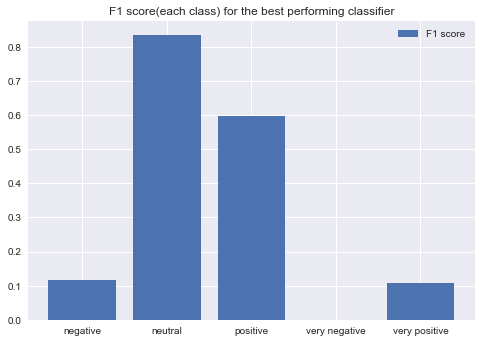

In [20]:
# a bar chart graph with the F1 score for each class
# sentiment polarity labels on x-axis, F1 score on Y axis
plt.style.use('seaborn')

f1 = fbeta_score(pred, test_labels, beta=1, average=None)
senti_pol_label = ['negative', 'neutral', 'positive', 'very negative', 'very positive']
plt.title("F1 score(each class) for the best performing classifier")
plt.bar(senti_pol_label, f1, label='F1 score')
plt.legend(loc='best')

### Q2: Improve the effectiveness of the LogisticRegression with TF-IDF vectorization from Q1

In [21]:
# baseline

evaluation_summary(TfidfVectorizer(), DummyClassifier(strategy='stratified'))

weighted avg F1 of training data:   0.474
accuracy of training data:   0.474
weighted avg precision of training data:   0.473
weighted avg recall of training data:   0.474
classification report:
                precision    recall  f1-score   support

     negative      0.107     0.100     0.104       229
      neutral      0.629     0.632     0.630      1952
     positive      0.259     0.259     0.259       847
very negative      0.000     0.000     0.000        22
very positive      0.000     0.000     0.000        59

     accuracy                          0.474      3109
    macro avg      0.199     0.198     0.199      3109
 weighted avg      0.473     0.474     0.474      3109

weighted avg F1 of test data:   0.467
classification report:
                precision    recall  f1-score   support

     negative      0.074     0.072     0.073       292
      neutral      0.617     0.625     0.621      2483
     positive      0.283     0.283     0.283      1103
very negative      0.00

(0.474, 0.467)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def tune(vectorizer, classifier):
    params = {
        "preprocessor__sublinear_tf": ('True', 'False'),
        "preprocessor__max_features": [None, 5000, 10000, 25000],
        "classifier__C": [1, 10],
        "classifier__max_iter": [5000, 8000]
    }
    
    pipe = Pipeline([('preprocessor', vectorizer),
                     ('classifier', classifier)])
    grid_search = GridSearchCV(pipe, verbose=1, param_grid=params, n_jobs=-1, 
                               scoring='f1_macro', cv=2)
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipe.steps])
    print("parameters:")
    print(params)

    grid_search.fit(train_data['body'], train_labels)

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    return best_parameters

In [23]:
# tune the parameters
tune(TfidfVectorizer(), LogisticRegression())

Performing grid search...
pipeline: ['preprocessor', 'classifier']
parameters:
{'preprocessor__sublinear_tf': ('True', 'False'), 'preprocessor__max_features': [None, 5000, 10000, 25000], 'classifier__C': [1, 10], 'classifier__max_iter': [5000, 8000]}
Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   40.4s finished


Best score: 0.436
Best parameters set:
	classifier__C: 10
	classifier__max_iter: 5000
	preprocessor__max_features: 5000
	preprocessor__sublinear_tf: 'True'


{'memory': None,
 'steps': [('preprocessor',
   TfidfVectorizer(max_features=5000, sublinear_tf='True')),
  ('classifier', LogisticRegression(C=10, max_iter=5000))],
 'verbose': False,
 'preprocessor': TfidfVectorizer(max_features=5000, sublinear_tf='True'),
 'classifier': LogisticRegression(C=10, max_iter=5000),
 'preprocessor__analyzer': 'word',
 'preprocessor__binary': False,
 'preprocessor__decode_error': 'strict',
 'preprocessor__dtype': numpy.float64,
 'preprocessor__encoding': 'utf-8',
 'preprocessor__input': 'content',
 'preprocessor__lowercase': True,
 'preprocessor__max_df': 1.0,
 'preprocessor__max_features': 5000,
 'preprocessor__min_df': 1,
 'preprocessor__ngram_range': (1, 1),
 'preprocessor__norm': 'l2',
 'preprocessor__preprocessor': None,
 'preprocessor__smooth_idf': True,
 'preprocessor__stop_words': None,
 'preprocessor__strip_accents': None,
 'preprocessor__sublinear_tf': 'True',
 'preprocessor__token_pattern': '(?u)\\b\\w\\w+\\b',
 'preprocessor__tokenizer': None,


In [24]:
# result on test data

preprocessor = TfidfVectorizer(sublinear_tf=True, max_features=5000)

pipe = Pipeline([('preprocessor', preprocessor),
                 ('classifier', LogisticRegression(C=10, max_iter=5000))])
pipe.fit(train_data['body'], train_labels)
pipe_pred = pipe.predict(test_data['body'])
print(metrics.classification_report(pipe_pred, test_labels, digits=3))

               precision    recall  f1-score   support

     negative      0.316     0.578     0.408       154
      neutral      0.881     0.797     0.837      2782
     positive      0.672     0.716     0.693      1034
very negative      0.250     0.667     0.364        12
very positive      0.209     0.529     0.300        34

     accuracy                          0.765      4016
    macro avg      0.466     0.657     0.520      4016
 weighted avg      0.798     0.765     0.777      4016



In [25]:
# Manually examine the predictions of your optimised classifier on the test set

pipe_result = pd.DataFrame()
pipe_result['content'] = test_data['body']
pipe_result['prediction'] = pipe_pred
pipe_result['label'] = test_labels

In [26]:
mismatch = pipe_result[pipe_result['prediction'] != pipe_result['label']]
mismatch['label'].value_counts()

positive         362
neutral          298
negative         193
very positive     68
very negative     24
Name: label, dtype: int64

In [28]:
for label in senti_pol_label:
    print('=' * 50)
    print("prediction distribution when label = ", label)
    print(mismatch[mismatch['label'] == label]['prediction'].value_counts())

prediction distribution when label =  negative
neutral          182
positive           7
very negative      3
very positive      1
Name: prediction, dtype: int64
prediction distribution when label =  neutral
positive         237
negative          54
very positive      6
very negative      1
Name: prediction, dtype: int64
prediction distribution when label =  positive
neutral          350
very positive      9
negative           3
Name: prediction, dtype: int64
prediction distribution when label =  very negative
neutral     16
negative     8
Name: prediction, dtype: int64
prediction distribution when label =  very positive
positive    50
neutral     18
Name: prediction, dtype: int64


In [29]:
mis_detail = mismatch[(mismatch['label'] == 'positive') & (mismatch['prediction'] == 'neutral')]['content'].tolist()
mis_detail

["Superman has a healing factor that is arguably better than Deadpool's since he doesn't leave scars. But why the hell would Superman need to heal from bullets and explosions the way Deadpool does? He's freaking Superman! I guess nothing changes.",
 'That happens a lot. Regular-Superman heals from Kryptonite stabbing/shooting/beatings beams pretty quickly after the rock is removed from his body. His healing factor is grossly underestimated on this subreddit.',
 "Healing factor as in wound healing (including dismemberment and the like) or complete regeneration of life?\n\nIf its the latter, than Rai is almost unstoppable, if he can use his powers without worrying about draining his life\n\nIf it's the former, then a good boost, but he was practically untouchable to begin with",
 'On a beach someplace warm and far away from anybody else. ',
 "Some people do, and some people don't regardless of their weight or level of fitness. I've heard some people say that they get a self-sustaining ad

### Q3: Add two features to (try to) improve sentiment polarity classification performance obtained in Q2

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# All important step to set your transformers and vectorizers

numeric_features = ['sentiment.subjectivity']
numeric_transformer = StandardScaler()

categorical_features = ['majority_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

text_features = 'body'
text_transformer = TfidfVectorizer(sublinear_tf=True, max_features=5000)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('tfidf', text_transformer, text_features)],
            remainder='drop')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(C=10, max_iter=5000))])
clf.fit(train_data, train_labels)
pred_add = clf.predict(test_data)
print(metrics.classification_report(pred_add, test_labels, digits=3))

               precision    recall  f1-score   support

     negative      0.390     0.579     0.466       190
      neutral      0.888     0.847     0.867      2637
     positive      0.738     0.731     0.734      1112
very negative      0.406     0.722     0.520        18
very positive      0.326     0.475     0.386        59

     accuracy                          0.796      4016
    macro avg      0.550     0.671     0.595      4016
 weighted avg      0.813     0.796     0.803      4016



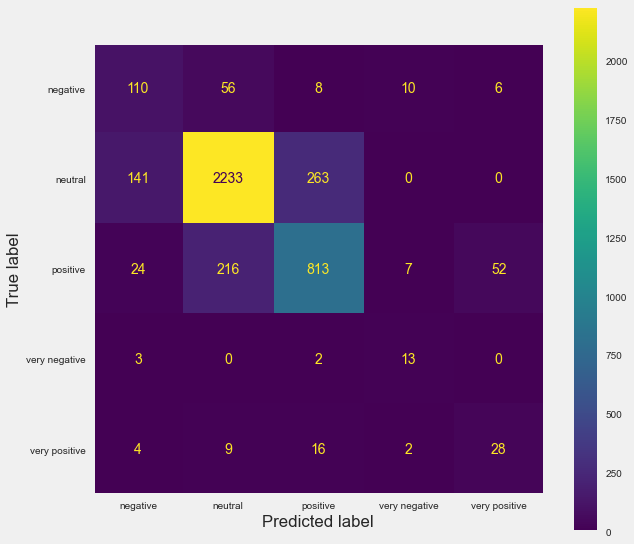

In [31]:
# confusion metrix
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 9))
ax.grid(False)
cm = metrics.confusion_matrix(pred_add, test_labels,)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=senti_pol_label)
disp.plot(ax=ax)